In [1]:
import fitsio
import numpy as np
from matplotlib import pyplot as plt

In [36]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [2]:
fs = fitsio.read('/global/cscratch1/sd/adematti/legacysim/dr9/ebv1000shaper/south/file0_rs0_skip0/merged/matched_input.fits') #obiwan outputs in DECaLS

In [5]:
seld = fs['flux_g']*0 == 0 #select detected
seld &= fs['flux_g'] > 0.2 #also select within this relevant gflux range
seld &= fs['flux_g'] < 2

In [6]:
fsd = fs[seld]

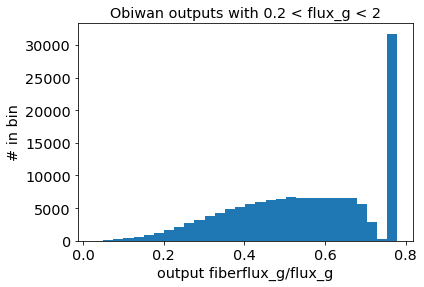

In [37]:
a = plt.hist(fsd['fiberflux_g']/fsd['flux_g'],bins=30)
plt.xlabel('output fiberflux_g/flux_g')
plt.ylabel('# in bin')
plt.title('Obiwan outputs with 0.2 < flux_g < 2')
plt.show()

The spike is for type PSF, take a look at what the histograms look like by type:


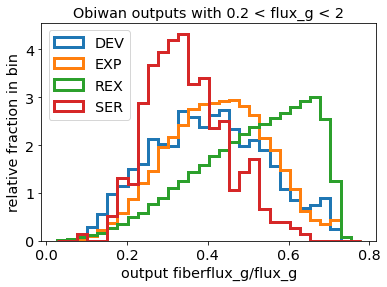

In [38]:
for tp in np.unique(fsd['type']):
    wt = fsd['type'] == tp
    if tp != 'PSF':
        plt.hist(fsd[wt]['fiberflux_g']/fsd[wt]['flux_g'],bins=a[1],density=True,label=tp,histtype='step',linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('output fiberflux_g/flux_g')
plt.ylabel('relative fraction in bin')
plt.title('Obiwan outputs with 0.2 < flux_g < 2')
plt.show()

Generally, this makes sense. The more complex the type, the more extended it is and the smaller the fraction of within the fiber.

What happens if we now look at the recovered fiberflux vs input?

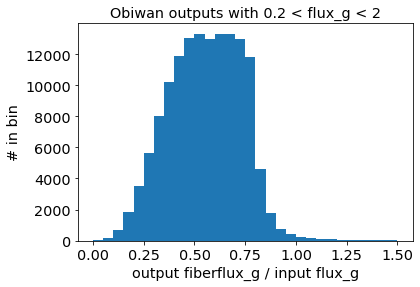

In [39]:
b = plt.hist(fsd['fiberflux_g']/fsd['input_flux_g'],bins=30,range=(0,1.5))
plt.xlabel('output fiberflux_g / input flux_g')
plt.ylabel('# in bin')
plt.title('Obiwan outputs with 0.2 < flux_g < 2')
plt.show()

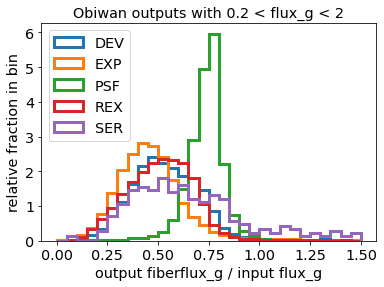

In [40]:
for tp in np.unique(fsd['type']):
    wt = fsd['type'] == tp
    #if tp != 'PSF':
    plt.hist(fsd[wt]['fiberflux_g']/fsd[wt]['input_flux_g'],bins=b[1],density=True,label=tp,histtype='step',linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('output fiberflux_g / input flux_g')
plt.ylabel('relative fraction in bin')
plt.title('Obiwan outputs with 0.2 < flux_g < 2')
plt.show()

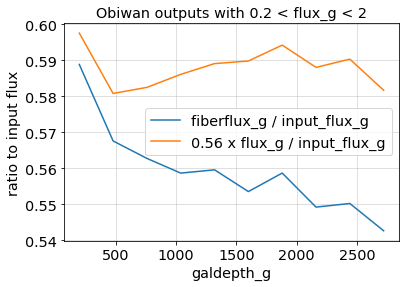

In [42]:
a = plt.hist(fsd['input_galdepth_g'],range=(200,3000))
b = plt.hist(fsd['input_galdepth_g'],weights=fsd['fiberflux_g']/fsd['input_flux_g'],bins=a[1])
c = plt.hist(fsd['input_galdepth_g'],weights=fsd['flux_g']/fsd['input_flux_g'],bins=a[1])
plt.clf()
plt.plot(a[1][:-1],b[0]/a[0],label='fiberflux_g / input_flux_g')
plt.plot(a[1][:-1],c[0]/a[0]*.56,label='0.56 x flux_g / input_flux_g')
plt.legend()
plt.xlabel('galdepth_g')
plt.ylabel('ratio to input flux')
plt.title('Obiwan outputs with 0.2 < flux_g < 2')
plt.grid(alpha=0.5)
plt.show()